In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# 라이브러리
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from tqdm import tqdm

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 폰트 깨짐 방지
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/삼성화재&Postech 데이터 리스크 /데이터/기상/최저기온이상치_최종최종이거.csv',encoding='UTF-8')

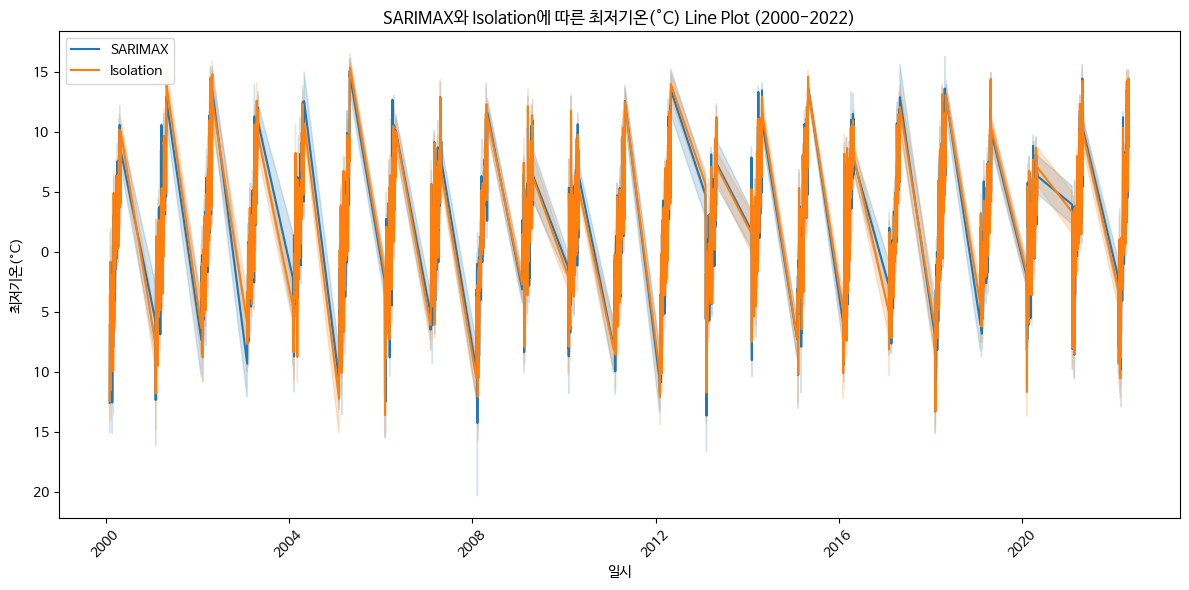

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 프레임에서 '일시' 열을 datetime 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 년도 범위를 설정
start_year = 2000
end_year = 2022

# 필터링된 데이터를 생성
filtered_sarimax_data = data[(data['SARIMAX'] == -1) & (data['일시'].dt.year >= start_year) & (data['일시'].dt.year <= end_year)]
filtered_isolation_data = data[(data['isolation'] == -1) & (data['일시'].dt.year >= start_year) & (data['일시'].dt.year <= end_year)]

plt.figure(figsize=(12, 6))  # 그림 크기 설정

# SARIMAX 결과에 대한 line plot
sns.lineplot(x='일시', y='최저기온(°C)', data=filtered_sarimax_data, label='SARIMAX')

# Isolation 결과에 대한 line plot
sns.lineplot(x='일시', y='최저기온(°C)', data=filtered_isolation_data, label='Isolation')

plt.title('SARIMAX와 Isolation에 따른 최저기온(°C) Line Plot (2000-2022)')
plt.xlabel('일시')
plt.ylabel('최저기온(°C)')
plt.xticks(rotation=45)
plt.legend()  # 범례 추가

plt.tight_layout()
plt.show()


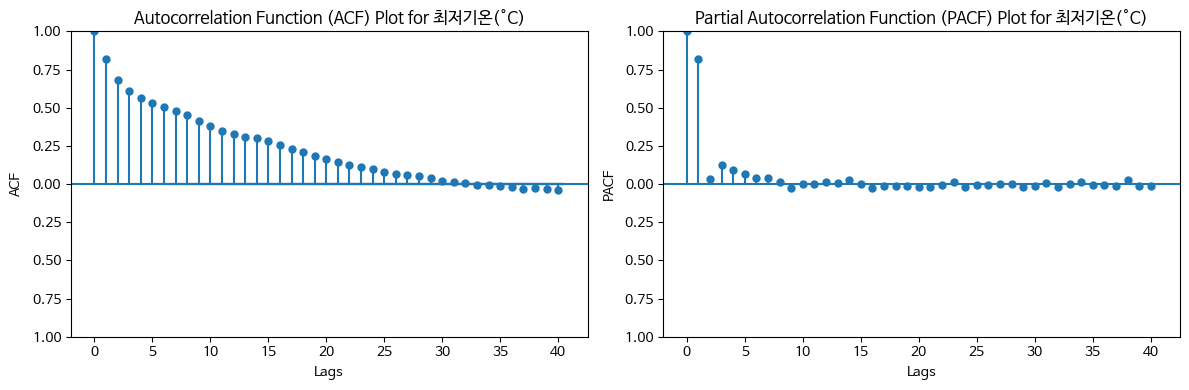

In [6]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming location_data contains your time series data with '최저기온(°C)' column
series = data['최저기온(°C)']

# Create subplots for ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(series, lags=40, ax=ax1)
ax1.set_xlabel('Lags')
ax1.set_ylabel('ACF')
ax1.set_title('Autocorrelation Function (ACF) Plot for 최저기온(°C)')

# PACF plot
plot_pacf(series, lags=40, ax=ax2)
ax2.set_xlabel('Lags')
ax2.set_ylabel('PACF')
ax2.set_title('Partial Autocorrelation Function (PACF) Plot for 최저기온(°C)')

plt.tight_layout()
plt.show()